<a href="https://colab.research.google.com/github/xGSPotato/4483-Undergraduate-Online-6/blob/main/ST_Assignment_TESLA_Stock_Price_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Reading the dataset**


* Using the PANDAS package, read the dataset, remove duplicates and print sample data for inspection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Tesla

/content/drive/MyDrive/Tesla


In [ ]:
!ls

DataForML.pkl  Final_LINEAR_Model.pkl  Final_XGB_Model.pkl  TeslaData.csv


This Project is based on the TESLA Stock Price Prediction Dataset available from Kaggle repository (https://www.kaggle.com/datasets/amohankumar/tesla-stock-price-prediction-dataset/data)





*   This analysis aims to create a machine learning model for predicting Tesla stock prices by examining historical trading data, including opening, closing, highest, lowest prices, adjusted close price, and trading volume. The goal is to enhance investment strategies and inform financial decisions based on trends and patterns in Tesla's stock performance over time.
*   This Dataset contains the Stock prices of TESLA Company the opening price, closing price, low price etc.. Stock Details of the Year 29/09/2021 to 29/09/2022.
*   Our project involves creating a machine learning model to predict stock prices for the coming years.












In [ ]:
# Supressing the warning messages, ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
TeslaData=pd.read_csv('/content/drive/MyDrive/Tesla/TeslaData.csv', encoding='latin')
print('Shape before deleting duplicate values:', TeslaData.shape)

# Removing duplicate rows if any
TeslaData=TeslaData.drop_duplicates()
print('Shape After deleting duplicate values:', TeslaData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
TeslaData.head(10)

Shape before deleting duplicate values: (253, 7)
Shape After deleting duplicate values: (253, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
5,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
6,2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400
7,2021-10-08,265.403320,265.459991,260.303345,261.829987,261.829987,50215800
8,2021-10-11,262.549988,267.079987,261.833344,263.980011,263.980011,42600900
9,2021-10-12,266.976654,270.773346,265.523346,268.573334,268.573334,66060000


In [ ]:
TeslaData.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
243,2022-09-16,299.609985,303.709991,295.600006,303.350006,303.350006,86949500
244,2022-09-19,300.089996,309.839996,297.799988,309.070007,309.070007,60231200
245,2022-09-20,306.910004,313.329987,305.579987,308.730011,308.730011,61642800
246,2022-09-21,308.290009,313.799988,300.630005,300.799988,300.799988,62555700
247,2022-09-22,299.859985,301.290009,285.820007,288.589996,288.589996,70545400
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


# Step 1.1: Getting information about the Tesla DataFrame


In [ ]:
TeslaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


# Key observation from Step 1 about Data Description
*   The file contains 253 prediction details, dated from 2021-09-29 until 2022-09-29.
*   The file does not have any duplicate entries and missing values.
*   There are only seven attributes, which are outlined below:
  1.   Date - self explanatory, no brainer. The date of the stock data entry.
  2.   Open - The stock's opening price on that day.
  3.   High - The highest price of the stock on that day.
  4.   Low - The lowest price of the stock on that day.
  5.   Close - The closing price of the stock on that day.
  6.   Adj Close - The adjusted closing price (adjusted for splits and dividends).
  7.   Volume - The number of shares traded.

# **Step 2: Problem statement definition**
As mentioned above, this analysis aims to create a machine learning model for predicting Tesla stock prices by examining historical trading data, including opening, closing, highest, lowest prices, adjusted close price, and trading volume. The goal is to enhance investment strategies and inform financial decisions based on trends and patterns in Tesla's stock performance over time.


  *   Creating  a prediction model to predict the Adjusted closing price of Telsa Shares since it's a typical choice for stock price prediction
  *   Target Variable: Adj. close
      *   Predictors/Features: Date, Open, High, Low, Close, Volume





# **Step 3: Visualising the distribution of Target variable**
* Identify the dependent/target variable, or the prediction variable and look at the distribution to assess the class imbalance in data (whether the data is balanced or skewed).

Based on the problem statement, we need to create a supervised machine learning regression model since the target variable—Tesla's stock price—is continuous. This model will analyse historical trading data to predict future stock prices, enabling better investment decisions.



array([[<Axes: title={'center': 'Adj Close'}>]], dtype=object)

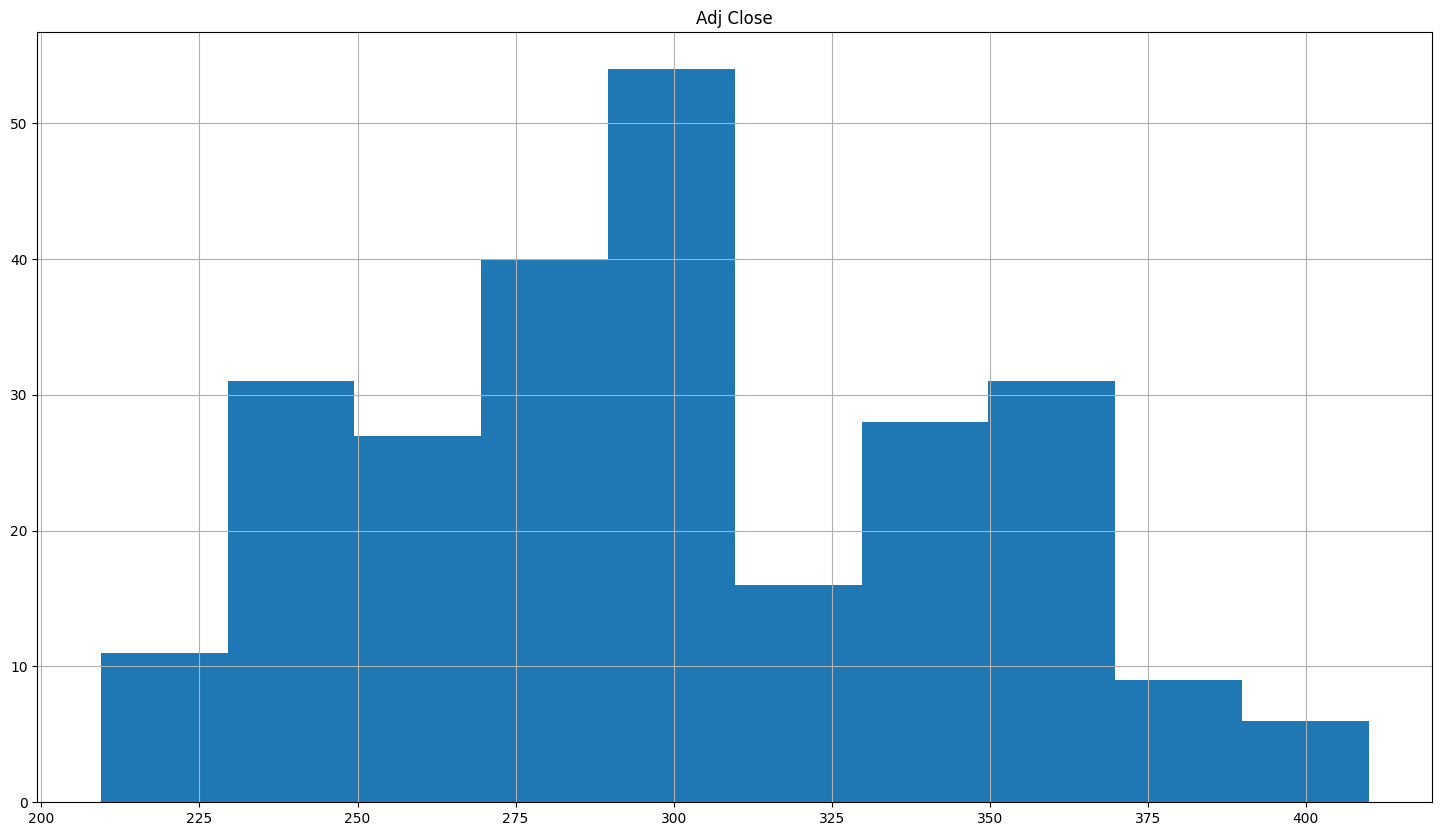

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
# Create a histogram to visualize the distribution of the trading Close price
# and Adj Close price in the Tesla dataset

TeslaData.hist('Adj Close', figsize=(18,10))



In [ ]:
skewness = TeslaData['Adj Close'].skew()
print(f'Skewness: {skewness}')

Skewness: 0.21512122738397593


# Observation from Step 3
The above shows that the distribution appear to be slightly skewed. A skewness of 0.215 suggest a slight positive skew in ourdata, but it's pretty close to zero and in good shape.

# **Step 4: Data exploration at basic level**
* This step is needed to gauge the overall data.
* The volume of data, the types of columns present in the data.
*  Initial assessment of the data is needed to identify which columns are Quantitative, Categorical or Qualitative.
* Identify and remove unwanted columns.






In [ ]:
# Looking at sample rows in the data again
TeslaData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [ ]:
# Looking at sample rows in the data again
TeslaData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TeslaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
# Looking at the descriptive statistics of the data
TeslaData.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
unique,253,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-09-29,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,NaN,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,NaN,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,NaN,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,NaN,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,NaN,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07


In [ ]:
TeslaData.nunique()

,0
Date,253
Open,249
High,251
Low,251
Close,252
Adj Close,252
Volume,253


# Observation from Step 4:
* There is no gap in dataframe as all column appearing with same value.
* There are no missing values in the dataset.
* There are 5 Fractional(float) 1 Integer(Int),  1 Object dataset identified
* Date: Qualitative (Categorical) and must be converted to datetime64 for proper date format for time-based analysis.
* Open, High, Low, Close and Adj Close: are all quatitative, which are continous numerical values (float type)
* Volume: Quantitative - integer type


# Observation from Step 4.1: Removing Unwanted Columns
As there is no unwanted column and currently, all columns seems relevant apart from coverting the Date to a proper date format

In [ ]:
TeslaData['Date'] = pd.to_datetime(TeslaData['Date'], format='%Y-%m-%d')

In [ ]:
TeslaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj Close  253 non-null    float64       
 6   Volume     253 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


# **Step 5: Visual Exploratory Data Analysis (EDA) of data (with histogram and barcharts)**
* This requires visualising distribution of all the categorical predictor variables in the data using bar plots, and continuous predictor variables using histograms.

# Categorical Predictor
* Since there are no categorical predictor variables in this dataset, plotting bar charts for this instance will be skipped. All the available data (e.g., Open, High, Low, Close, Adj Close, and Volume) are continuous, and therefore, histograms or other continuous-variable plots are more appropriate to visualize the distribution of these variables.

Hence, skipping the categorical and plotting the continous predictor variables using histograms to analyse.

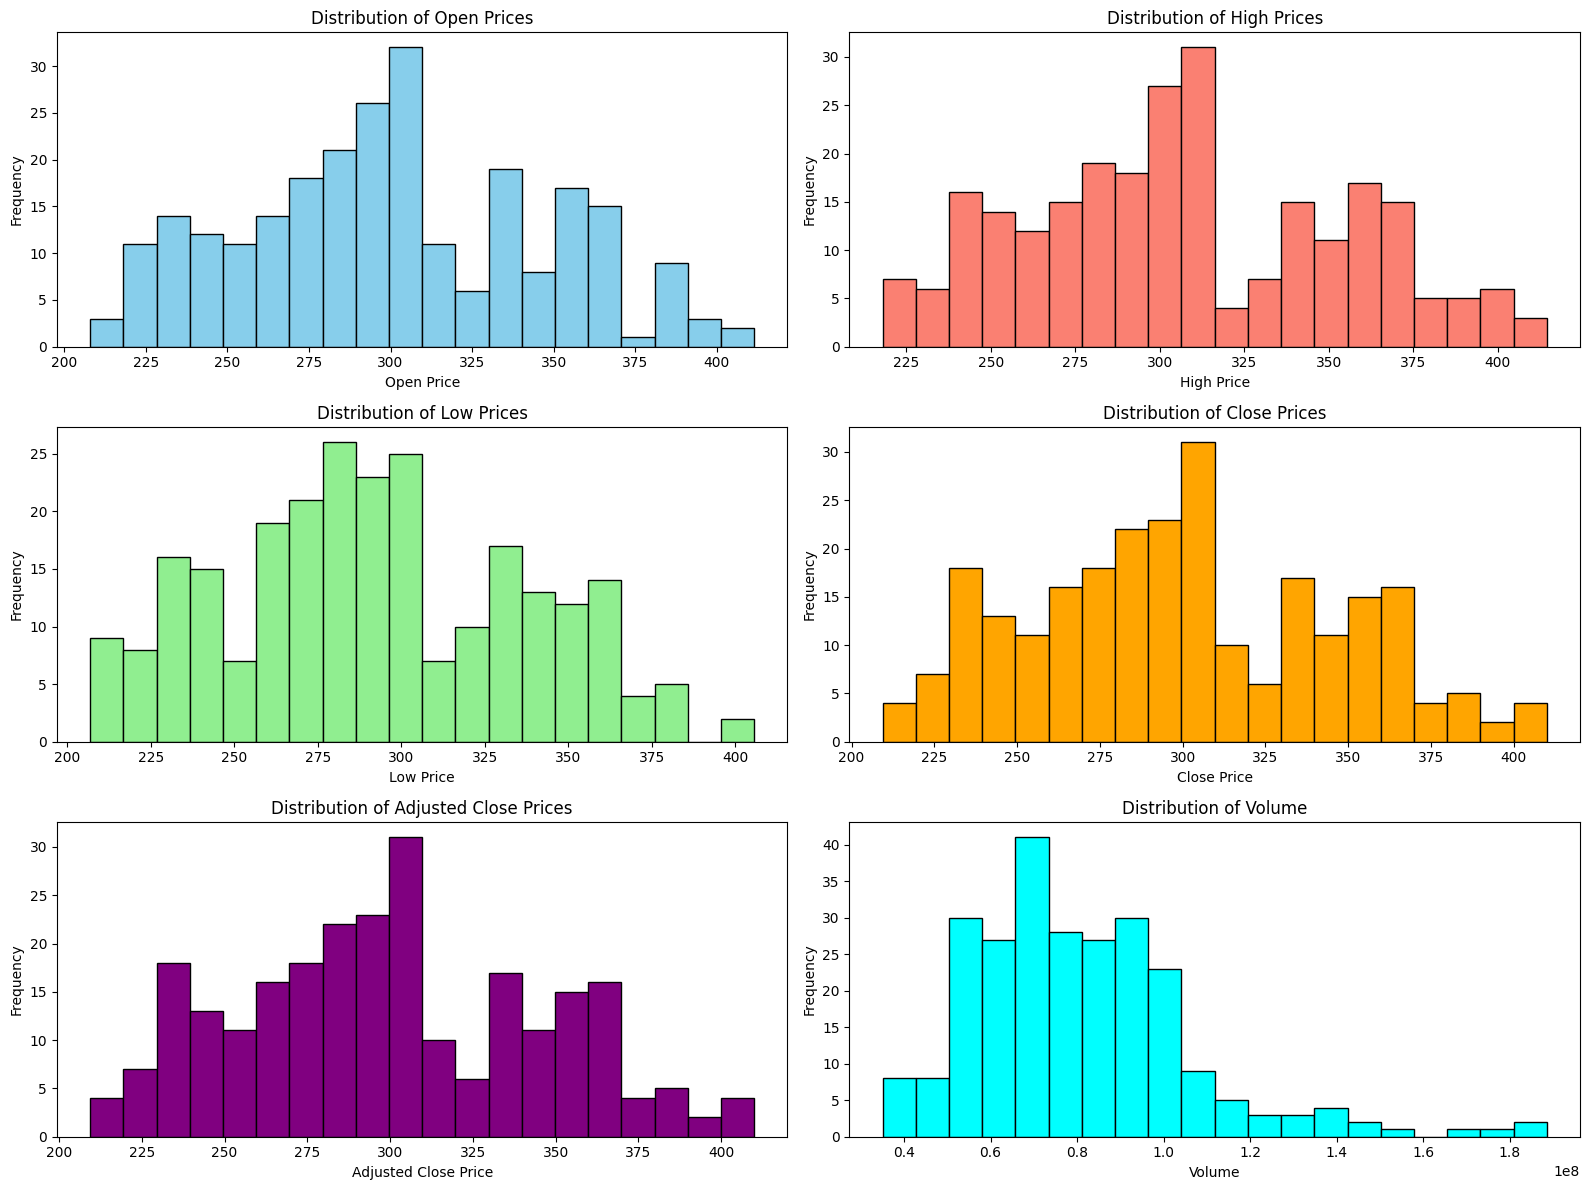

In [ ]:
import matplotlib.pyplot as plt

df = TeslaData

# Set the size of the figure
plt.figure(figsize=(16, 12))

# Histogram for 'Open' prices with sky blue color for distinct identity.

plt.subplot(3, 2, 1)
plt.hist(df['Open'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

# Histogram for 'High' prices with salmon color for distinct identity
plt.subplot(3, 2, 2)
plt.hist(df['High'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of High Prices')
plt.xlabel('High Price')
plt.ylabel('Frequency')

# Histogram for 'Low' prices with lightgreen color for distinct identity
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 3)
plt.hist(df['Low'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Low Prices')
plt.xlabel('Low Price')
plt.ylabel('Frequency')

# Histogram for 'Close' prices with orange color for distinct identity
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 4)
plt.hist(df['Close'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Histogram for 'Adj Close' prices with purple color for distinct identity
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 5)
plt.hist(df['Adj Close'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')

# Histogram for 'Volume'with cyan color for distinct identity
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 6)
plt.hist(df['Volume'], bins=20, color='cyan', edgecolor='black')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
skewness = TeslaData[['Open', 'High', 'Low', 'Close',
                      'Adj Close', 'Volume']].skew()
print(f'Skewness: {skewness}')

Skewness: Open         0.189073
High         0.220184
Low          0.166720
Close        0.215121
Adj Close    0.215121
Volume       1.299486
dtype: float64


# Step 5 - Key Observation:
 * Based on the above histogram, and skewness:
 * Open Prices shows approximately symmetric
 * High Prices shows approximately symmetric
 * Low Prices shows approximately symmetric
 * Close Prices shows approximately symmetric
 * Adj Close Prices shows approximately symmetric
 * Volume shows highly skewed to the right

# General Observation:
Price-related variables share a similar distribution pattern, with peaks at lower values and a gradual decline at higher ranges.

Volume stands out with significant skewness, indicating that while high volumes are infrequent, they do happen.

In short, price-related variables are nearly symmetric, but volume shows higher skewness, suggesting possible outliers or spikes in trading volume.


**# Step 6: Outlier analysis**
Removal of outliers and missing values is an important step, as the outliers are extreme values in the data, which are far away from most of the values. You can see them as the tails in the histogram.

# Step 6.1 Standard Deviation and Mean


In [ ]:
import pandas as pd
import numpy as np

# Load the data
df = TeslaData

# Compute Z Score
volume_mean = np.nanmean(df.Volume.values.tolist())
volume_std = np.nanstd(df.Volume.values.tolist())

print("Mean Volume Score is: ", volume_mean)
print("Std Volume Score is: ", volume_std)

Mean Volume Score is:  80509379.0513834
Std Volume Score is:  25415567.242398534


In [ ]:
np.nanstd(df.Volume.values.tolist())

25415567.242398534

In [ ]:
np.nanmean(df.Volume.values)

80509379.0513834

In [ ]:
#https://www.machinelearningplus.com/machine-learning/how-to-detect-outliers-with-z-score/ - referencing the How to detect outliers with z-score


import pandas as pd
import numpy as np

# Load the data
df = TeslaData

# Calculate the z-score for the volume data - From each observation, subtract the mean and divide by the standard deviation.
z_scores = np.abs((df['Volume'] - df['Volume'].mean()) / df['Volume'].std())

# Identify outliers (z-score > 2)
outliers = df[z_scores > 2]

# Replace outliers with the mean of the volume data
df.loc[outliers.index, 'Volume'] = df['Volume'].mean()

# Alternatively, we can remove the outliers however, we decided to threat the outliers instead

array([[<Axes: title={'center': 'Volume'}>]], dtype=object)

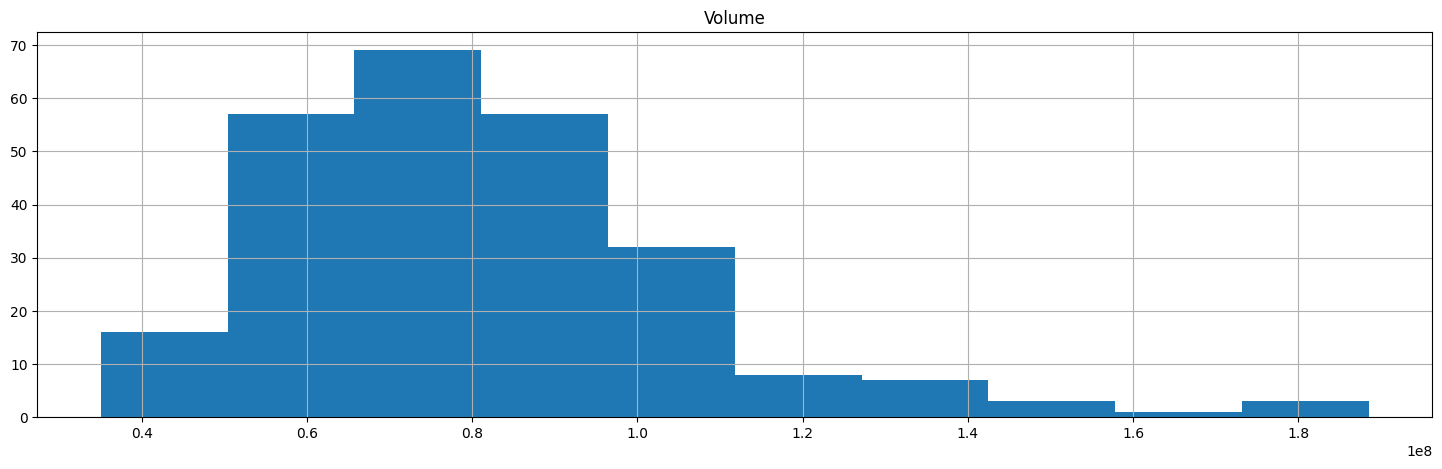

In [ ]:
TeslaData.hist(['Volume'], figsize=(18,5))

In [ ]:
skewness = TeslaData[['Open', 'High', 'Low', 'Close',
                      'Adj Close', 'Volume']].skew()
print(f'Skewness: {skewness}')

Skewness: Open         0.189073
High         0.220184
Low          0.166720
Close        0.215121
Adj Close    0.215121
Volume       1.299486
dtype: float64


**# Step 7: Missing values analysis - Options for treating the missing values**
* Delete the missing value rows if there are only few records,
* Impute the missing values with MEDIAN value for continuous variables,
* Impute the missing values with MODE value for categorical variables,
* Interpolate the values based on nearby values,
* Interpolate the values based on business logic.

In [ ]:
# Finding how many missing values are there for each column
TeslaData.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# Observations from Step 7: Missing Value Analysis
* No missing values in this data!
* So no removal of any data samples(rows) is needed.


# **Step 8: Feature selection - Visual and statistic correlation analysis for selection of best features**

* If the target variable is continuous and the predictor is also continuous, visualise the relationship between the two variables using scatter plot and measure the strength of relation using a metric called Pearson's correlation value.
* Statistical feature selection (continuous Vs. continuous) using correlation value.
* When the target variable is continuous, and the predictor variable is categorical we analyse the relation using box plots.



# Step 8.1 - For this dataset, the Target variable is Continuous, hence we will be using the Scatter Plot.

* **Visual exploration of relationship between variables**
  * Continuous Vs Continuous ---- Scatter Plot

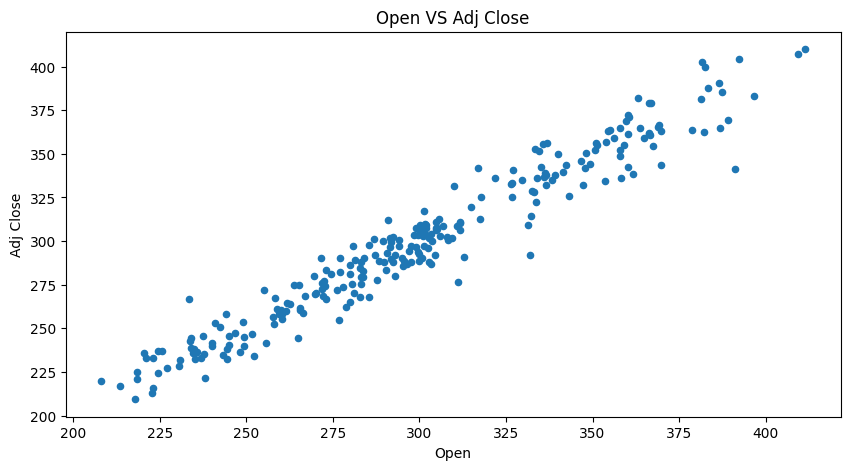

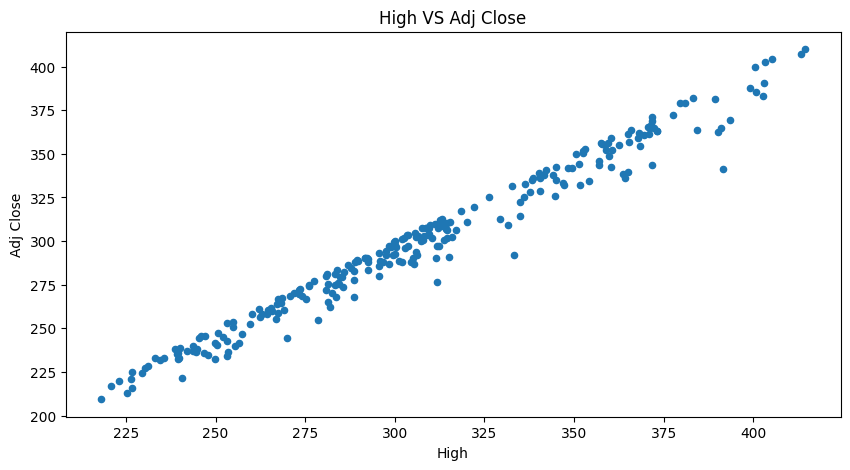

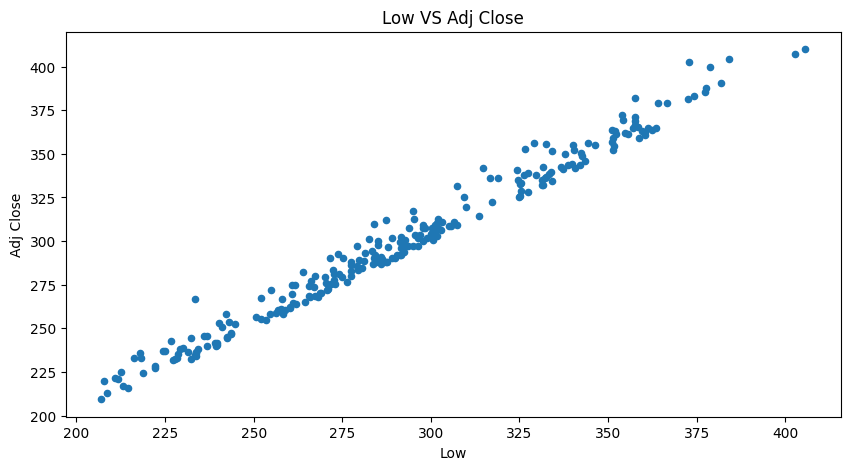

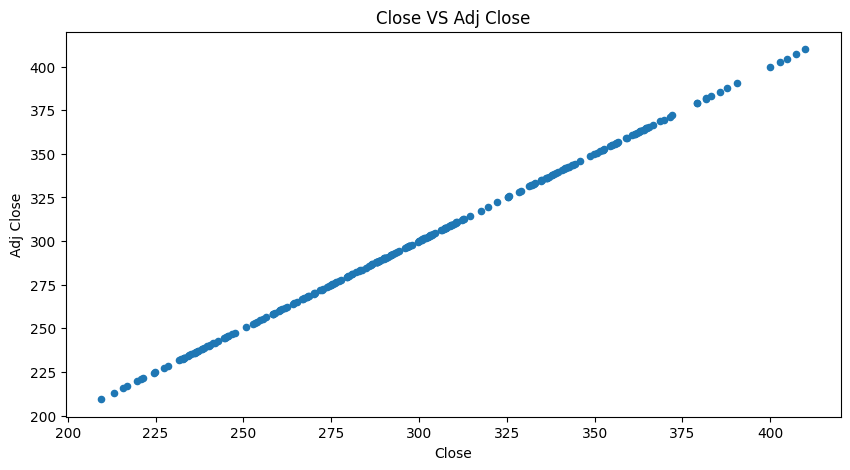

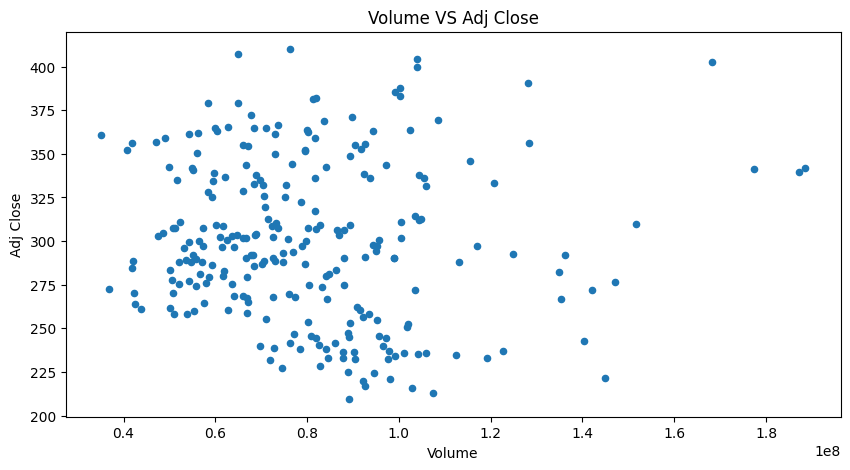

In [ ]:
ContinuousCols=['Open', 'High', 'Low', 'Close' , 'Volume']

# Plotting scatter chart for each predictor vs the "Adj Close" target variable
for predictor in ContinuousCols:
    TeslaData.plot.scatter(x=predictor, y='Adj Close', figsize=(10,5), title=predictor+" VS "+ 'Adj Close')

# Step 8 - Observation
* Both the Close and Adj Close target variables have shown an increasing trend in relation to the predictors Open, High, and Low. However, the Volume predictor does not exhibit a clear increasing or decreasing trend.


# **Step 9 - Statistical feature selection (categorical vs. continuous) using ANOVA test**
* Analysis of variance (ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.
* Assumption (H0) null hypothesis: There is no relation between the given variables (i.e. the average(mean) values of the numeric Target variable is same for all the groups in the categorical predictor variable).
* ANOVA test result: Probability of H0 (null hypothesis being true).


# Step 9 - Observation from Step 9
* As there is no Categorical vs Continious variable to explore, this will be skipped.

# **Step 9.1 - Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

*   For this dataset, the Target variable is Continuous, hence following  scenario will need attention

  * Continuous Target Variable Vs Continuous Predictor




# **What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.**

Reference - https://www.w3schools.com/python/pandas/pandas_correlations.asp

* 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

* 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

* -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

* 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Open','High', 'Low','Close', 'Adj Close', 'Volume' ]

# Creating the correlation matrix
CorrelationData=TeslaData[ContinuousCols].corr()
CorrelationData

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.991269,0.986364,0.971783,0.971783,-0.047793
High,0.991269,1.000000,0.988299,0.986715,0.986715,0.008397
Low,0.986364,0.988299,1.000000,0.990137,0.990137,-0.104980
Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Adj Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Volume,-0.047793,0.008397,-0.104980,-0.047791,-0.047791,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Adj Close'][abs(CorrelationData['Adj Close']) > 0.5 ]

,Adj Close
Open,0.971783
High,0.986715
Low,0.990137
Close,1.000000
Adj Close,1.000000


# Step 9.1 - Observation
* The price variables (Open, High, Low, Close, Adjusted Close) are all strongly correlated with each other, which is expected in stock market data.
* Volume has a weak negative correlation with price

# **Step 10: Selecting final predictors/features for building machine learning/AI model**
 * Based on the extensive tests with basic and visual exploratory data analysis, select the final features/predictors/columns for machine learning model.
  * 'Open', 'High', 'Low', 'Close'

In [ ]:
SelectedColumns=['Open', 'High','Low', 'Close']

# Selecting final columns
DataForML=TeslaData[SelectedColumns]
DataForML.head()

,Open,High,Low,Close
0,259.933319,264.500000,256.893341,260.436676
1,260.333344,263.043335,258.333344,258.493347
2,259.466675,260.260010,254.529999,258.406677
3,265.500000,268.989990,258.706665,260.510010
4,261.600006,265.769989,258.066681,260.196655


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# **Step 11: Data conversion to numeric values for machine learning/predictive analysis**

Convert the nominal variable to numeric using get_dummies() method.


In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Adj Close']=TeslaData['Adj Close']

# Printing sample rows
DataForML_Numeric.head()

,Open,High,Low,Close,Adj Close
0,259.933319,264.500000,256.893341,260.436676,260.436676
1,260.333344,263.043335,258.333344,258.493347,258.493347
2,259.466675,260.260010,254.529999,258.406677,258.406677
3,265.500000,268.989990,258.706665,260.510010,260.510010
4,261.600006,265.769989,258.066681,260.196655,260.196655


# Step 11.1 - Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

# **Step 12: Train/test data split and standardisation/normalisation of data**
* Splitting the data into training and testing sample.
* You can choose not to run standardisation/normalisation step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (optional step).
* However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable= 'Adj Close'
Predictors=['Open', 'High', 'Low', 'Close']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 12.1 - Standardization/Normalization of data

* Skipping this step, it's worth noting that the dataset already appears to have a relatively consistent scale, with most values ranging from 200 to 400. Therefore, the need for standardization or normalization may be less pressing compared to datasets with more extreme value ranges.

# **Step 13: Investigating multiple regression algorithms**
Build the machine learning/AI model with at least 5 algorithms, such as:
* linear regression,
* decision tree regressor,
* random forest regressor, adaboost regressor,
* XGBoost regressor,
* K-Nearest neighbor regression, and
* SVM regressor.

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low       Close   Adj Close  \
0  260.333344  263.043335  258.333344  258.493347  258.493347   
1  297.066681  297.510010  283.369995  294.356659  294.356659   
2  386.453339  402.863342  382.000000  390.666656  390.666656   
3  276.809998  278.433319  253.520004  254.679993  254.679993   
4  356.103333  360.333344  351.399994  359.013336  359.013336   

   PredictedAdj Close  
0               258.0  
1               294.0  
2               391.0  
3               255.0  
4               359.0  
Mean Accuracy on test data: 99.92139535912256
Median Accuracy on test data: 99.91694764058434

Accuracy values for 10-fold Cross Validation:
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9987561529584857

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low       Close   Adj Close  \
0  260.333344  263.043335  258.333344  258.493347  258.493347   
1  297.066681  297.510010  283.369995  294.356659  294.356659   
2  386.453339  402.863342  382.000000  390.666656  390.666656   
3  276.809998  278.433319  253.520004  254.679993  254.679993   
4  356.103333  360.333344  351.399994  359.013336  359.013336   

   PredictedAdj Close  
0               260.0  
1               296.0  
2               387.0  
3               255.0  
4               360.0  
Mean Accuracy on test data: 99.299719231461
Median Accuracy on test data: 99.5131571784928

Accuracy values for 10-fold Cross Validation:
 [99.38515435 99.25065402 99.30179677 99.3848044  99.44064636 99.27699768
 98.1852409  98.83378512 99.51194744 99.49358832]

Final Average Accuracy of the model: 99.21


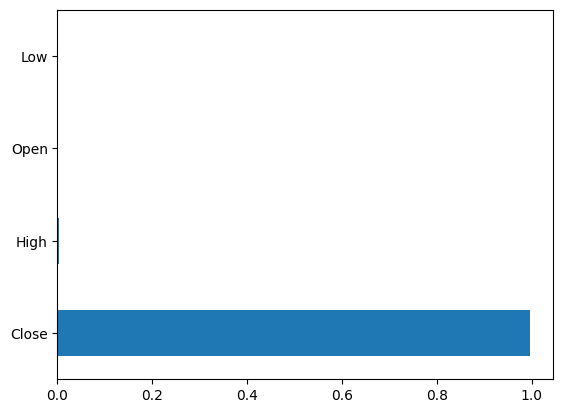

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9988177065441831

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low       Close   Adj Close  \
0  260.333344  263.043335  258.333344  258.493347  258.493347   
1  297.066681  297.510010  283.369995  294.356659  294.356659   
2  386.453339  402.863342  382.000000  390.666656  390.666656   
3  276.809998  278.433319  253.520004  254.679993  254.679993   
4  356.103333  360.333344  351.399994  359.013336  359.013336   

   PredictedAdj Close  
0               260.0  
1               292.0  
2               391.0  
3               259.0  
4               359.0  
Mean Accuracy on test data: 99.381652076922
Median Accuracy on test data: 99.6137658430533

Accuracy values for 10-fold Cross Validation:
 [99.36537931 99.38896748 99.53023362 99.43208545 99.58909075 99.47860977
 98.69166051 98.65283567 99.71345119 99.72185524]

Final Average Accuracy of the mod

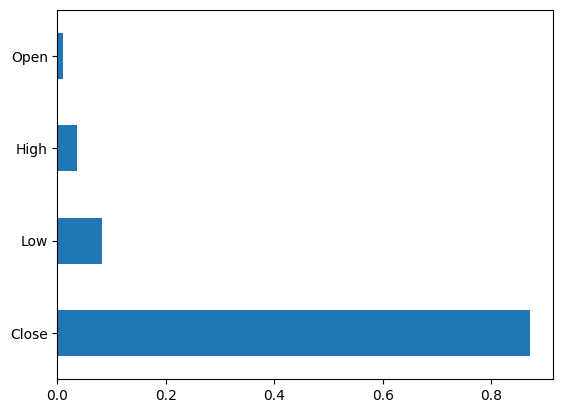

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.994032241846151

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low       Close   Adj Close  \
0  260.333344  263.043335  258.333344  258.493347  258.493347   
1  297.066681  297.510010  283.369995  294.356659  294.356659   
2  386.453339  402.863342  382.000000  390.666656  390.666656   
3  276.809998  278.433319  253.520004  254.679993  254.679993   
4  356.103333  360.333344  351.399994  359.013336  359.013336   

   PredictedAdj Close  
0               258.0  
1               293.0  
2               391.0  
3               256.0  
4               358.0  
Mean Accuracy on test data: 98.87752040430064
Median Accuracy on test data: 99.28215580232768

Accuracy values for 10-fold Cross Validation:
 [98.15663035 98.9004153  98.89067234 98.55043466 99.36654486 98.96577705
 97.80524105 97.70890587 99.42047951 99.5

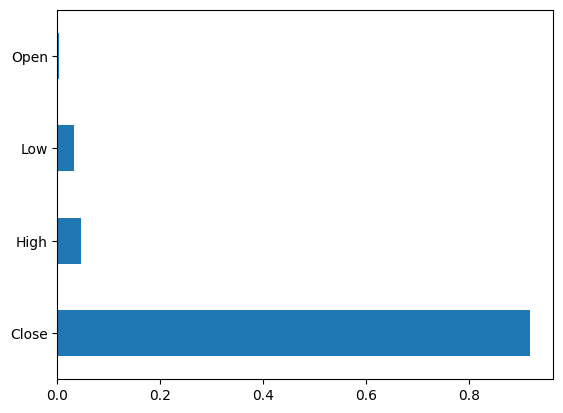

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(estimator=DTR, n_estimators=100, learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.999998173835198

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low       Close   Adj Close  \
0  260.333344  263.043335  258.333344  258.493347  258.493347   
1  297.066681  297.510010  28

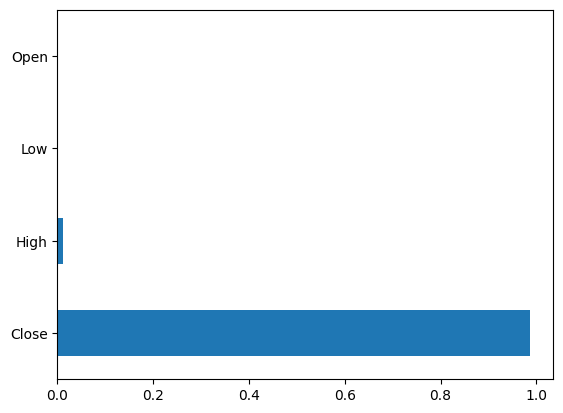

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

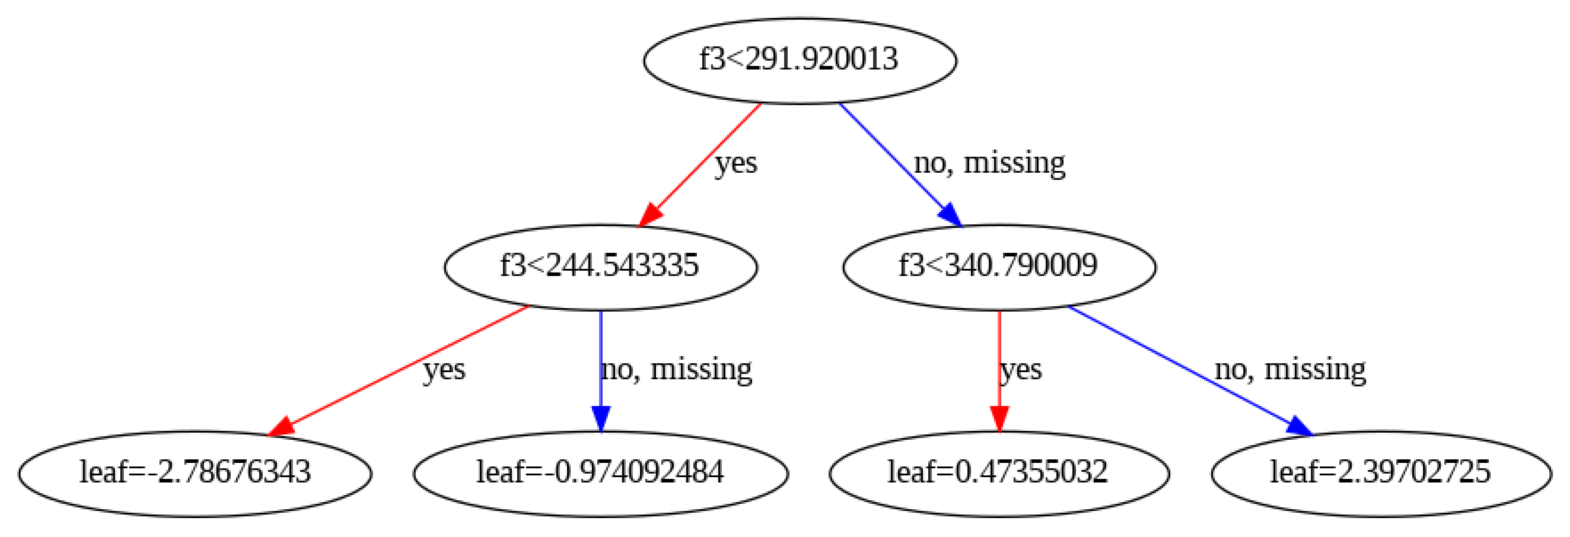

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

In [ ]:
# kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9972946540000819

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low       Close   Adj Close  \
0  260.333344  263.043335  258.333344  258.493347  258.493347   
1  297.066681  297.510010  283.369995  294.356659  294.356659   
2  386.453339  402.863342  382.000000  390.666656  390.666656   
3  276.809998  278.433319  253.520004  254.679993  254.679993   
4  356.103333  360.333344  351.399994  359.013336  359.013336   

   PredictedAdj Close  
0               261.0  
1               289.0  
2               391.0  
3               263.0  
4               358.0  
Mean Accuracy on test data: 99.14074970908
Median Accuracy on test data: 99.45684317231127

Accuracy values for 10-fold Cross Validation:
 [99.21785926 99.03321678 99.20201777 98.76717325 99.26647085 98.80126718
 98.82749255 98.93183316 99.33411263 99.51883238]

Final Average Accuracy of the model: 99.09


In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9875230015262714

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low       Close   Adj Close  \
0  260.333344  263.043335  258.333344  258.493347  258.493347   
1  297.066681  297.510010  283.369995  294.356659  294.356659   
2  386.453339  402.863342  382.000000  390.666656  390.666656   
3  276.809998  278.433319  253.520004  254.679993  254.679993   
4  356.103333  360.333344  351.399994  359.013336  359.013336   

   PredictedAdj Close  
0               263.0  
1               294.0  
2               371.0  
3               292.0  
4               356.0  
Mean Accuracy on test data: 96.57549873064401
Median Accuracy on test data: 98.92434758096816

Accuracy values for 10-fold Cross Validation:
 [95.86162299 92.39698953 97.46572207 97.97284471 98.44543948 97.98044341
 90.66265468 92.30151267 99.46331131 99.76066181]

Final Average Accuracy of the model: 96.23


# **Step 14: Selection of the best model**
* Based on the above/previous trials with different regression algorithms, select that algorithm which produces the best average accuracy.

  * Linear regression with 100% accuracy


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Adj Close'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Open', 'High' , 'Low' , 'Close']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(253, 4)
(253,)


# Step 14.1 - Cross validating the final model accuracy with predictors

In [ ]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
RegModel = LinearRegression()

# Executing 10-Fold Cross Validation on Linear Regression
# Supplying complete datasets X and y, as K-fold will handle the data split and selection of train/test sets automatically
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)

# Printing the accuracy values for 10-fold cross validation
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



Accuracy values for 10-fold Cross Validation:
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


# Step 14.2: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_LINEAR_Model=RegModel.fit(X,y)

# Step 14.3: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_LINEAR_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_LINEAR_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Tesla


# **Step 15: Deployment of the best model in production**
* In order to deploy the model follow steps outlined next.
  * Retrain/rebuild the model again using 100% data available.
  * Save the model as a serialised file which can be stored anywhere.
  *Create a python function which gets integrated with front-end viewer(GUI/ website etc.) to take all the inputs and returns the prediction.
  *Test the python function created with new unseen data. This ensures the prediction API has been successfully created and working.
  *Implement the machine learning/AI model available as the new python function now, as a desktop application with TkInter GUI library. Another option is to implement it as a web application with Flask or Streamlit Library.


In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Open', 'High' , 'Low' , 'Close']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_LINEAR_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

## Step 15.1: Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[261.222233,  261.041115,  257.66654,  257.413568],[262.222233,  262.041115,  258.66654,  258.413568]],columns=['Open', 'High' , 'Low' , 'Close'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

         Open        High        Low       Close
0  261.222233  261.041115  257.66654  257.413568
1  262.222233  262.041115  258.66654  258.413568


,Prediction
0,257.413568
1,258.413568


# Step 15.1 - Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Step 15.2 - Deploying a predictive model as an API
* Trying to build a prediction API function that takes four input parameters (open, high, low, and close prices) and returns a prediction.


In [ ]:
# Deploying the model with few parameters
# Function for predictions API

# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_Open , inp_High, inp_Low, inp_Close):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Open , inp_High, inp_Low, inp_Close]],
     columns=['Open', 'High', 'Low', 'Close'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_Open=261.222233,
                           inp_High=261.041115,
                           inp_Low=257.66654,
                            inp_Close=257.413568)

'{"Prediction":{"0":257.413568}}'

# Step 15.3 - Web Deployment using Flask Library/Package
# Installing the flask library required to create the API

In [ ]:
!pip install flask

# Step 15.4 - Creating Flask API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Open_value = float(request.args.get('Open'))
        High_value=float(request.args.get('High'))
        Low_value=float(request.args.get('Low'))
        Close_value=float(request.args.get('Close'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Open=Open_value,
                                                       inp_High=High_value,
                                                       inp_Low=Low_value,
                                                       inp_Close=Close_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# 15.5 Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


# END OF PROGRAMMING PROJECT